<a href="https://colab.research.google.com/github/Davron030901/Machine_Learning/blob/main/Beginner_Data_Science_Portfolio_Project_Walkthrough_(Kaggle_Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier


from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [2]:
!wget https://raw.githubusercontent.com/Davron030901/Scikit_learning/main/data/train.csv
!wget https://raw.githubusercontent.com/Davron030901/Scikit_learning/main/data/test.csv
!wget https://raw.githubusercontent.com/Davron030901/Scikit_learning/main/data/gender_submission.csv

--2024-12-09 11:28:27--  https://raw.githubusercontent.com/Davron030901/Scikit_learning/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB/s    in 0.009s  

2024-12-09 11:28:28 (6.85 MB/s) - ‘train.csv’ saved [61194/61194]

--2024-12-09 11:28:28--  https://raw.githubusercontent.com/Davron030901/Scikit_learning/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28629 (28K) [text/plain]
Sav

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe().round(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,1601,B96 B98,S
freq,1,577,7,4,644


In [8]:
# train_df.groupby(['Pclass'],as_index=False).agg({'Survived':'mean'}).round(3)
train_df.groupby(['Pclass'],as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df.groupby(['Sex'],as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df.groupby(['SibSp'],as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df.groupby(['Parch'],as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [12]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch']+1
test_df['Family_Size'] = train_df['SibSp'] + train_df['Parch']+1

In [13]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [14]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped'] = test_df['Family_Size'].map(family_map)

In [15]:
train_df.groupby(['Family_Size_Grouped'],as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [16]:
train_df.groupby(['Embarked'],as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


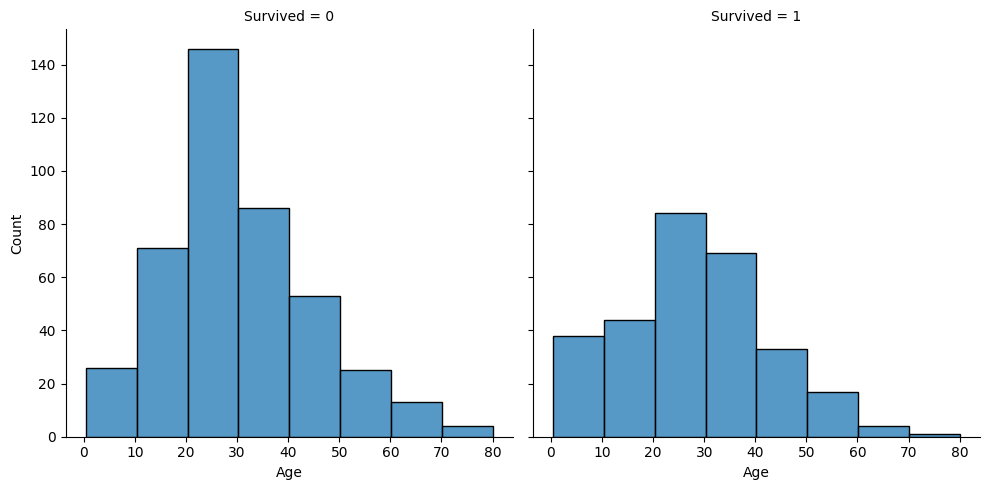

In [17]:
sns.displot(train_df,x='Age',col='Survived',binwidth=10,height=5)

In [18]:
train_df['Age_Cut']=pd.qcut(train_df['Age'],8)

In [19]:
test_df['Age_Cut']=pd.qcut(train_df['Age'],8)

In [20]:
train_df.groupby(['Age_Cut'],as_index=False)['Survived'].mean()

<ipython-input-20-351039488c3e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'],as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [21]:
train_df.loc[train_df['Age']<=16,'Age']=0
train_df.loc[(train_df['Age']>16) & (train_df['Age']<=20.125),'Age']=1
train_df.loc[(train_df['Age']>20.125) & (train_df['Age']<=24),'Age']=2
train_df.loc[(train_df['Age']>24) & (train_df['Age']<=28),'Age']=3
train_df.loc[(train_df['Age']>28) & (train_df['Age']<=32.312),'Age']=4
train_df.loc[(train_df['Age']>32.312) & (train_df['Age']<=38),'Age']=5
train_df.loc[(train_df['Age']>38) & (train_df['Age']<=47),'Age']=6
train_df.loc[(train_df['Age']>47) & (train_df['Age']<=80),'Age']=7
train_df.loc[train_df['Age']>80,'Age']

,Age


In [22]:
test_df.loc[test_df['Age']<=16,'Age']=0
test_df.loc[(test_df['Age']>16) & (test_df['Age']<=20.125),'Age']=1
test_df.loc[(test_df['Age']>20.125) & (test_df['Age']<=24),'Age']=2
test_df.loc[(test_df['Age']>24) & (test_df['Age']<=28),'Age']=3
test_df.loc[(test_df['Age']>28) & (test_df['Age']<=32.312),'Age']=4
test_df.loc[(test_df['Age']>32.312) & (test_df['Age']<=38),'Age']=5
test_df.loc[(test_df['Age']>38) & (test_df['Age']<=47),'Age']=6
test_df.loc[(test_df['Age']>47) & (test_df['Age']<=80),'Age']=7
test_df.loc[test_df['Age']>80,'Age']

,Age


In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


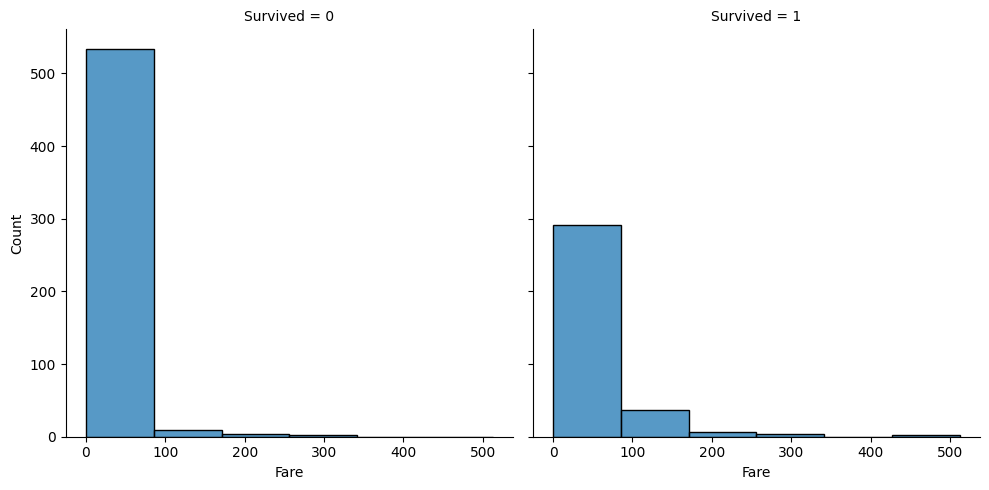

In [24]:
sns.displot(train_df,x='Fare',col="Survived",binwidth=80,height=5)

In [25]:
train_df['Fare_Cut']=pd.qcut(train_df['Fare'],6)
test_df['Fare_Cut']=pd.qcut(test_df['Fare'],6)

In [26]:
train_df.groupby(['Fare_Cut'],as_index=False)['Survived'].mean()

<ipython-input-26-08a1e360f460>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'],as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [27]:
train_df.loc[train_df['Fare']<=7.775,'Fare']=0
train_df.loc[(train_df['Fare']>7.775) & (train_df['Fare']<=8.662),'Fare']=1
train_df.loc[(train_df['Fare']>8.662) & (train_df['Fare']<=14.454),'Fare']=2
train_df.loc[(train_df['Fare']>14.454) & (train_df['Fare']<=26),'Fare']=3
train_df.loc[(train_df['Fare']>26) & (train_df['Fare']<=52.369),'Fare']=4
train_df.loc[(train_df['Fare']>52.369) & (train_df['Fare']<=512.329),'Fare']=5
train_df.loc[train_df['Fare']>512.329,'Fare']

,Fare
258,512.3292
679,512.3292
737,512.3292


In [28]:
test_df.loc[test_df['Fare']<=7.775,'Fare']=0
test_df.loc[(test_df['Fare']>7.775) & (test_df['Fare']<=8.662),'Fare']=1
test_df.loc[(test_df['Fare']>8.662) & (test_df['Fare']<=14.454),'Fare']=2
test_df.loc[(test_df['Fare']>14.454) & (test_df['Fare']<=26),'Fare']=3
test_df.loc[(test_df['Fare']>26) & (test_df['Fare']<=52.369),'Fare']=4
test_df.loc[(test_df['Fare']>52.369) & (test_df['Fare']<=512.329),'Fare']=5
test_df.loc[test_df['Fare']>512.329,'Fare']

,Fare
343,512.3292


In [29]:
train_df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [30]:
train_df['Title']=train_df['Name'].str.split(pat=',',expand=True)[1].str.split(pat='.',expand=True)[0].apply(lambda x:x.strip())
test_df['Title']=test_df['Name'].str.split(pat=',',expand=True)[1].str.split(pat='.',expand=True)[0].apply(lambda x:x.strip())

In [31]:
train_df.groupby(['Title'],as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [32]:
train_df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [33]:
train_df["Title"]=train_df["Title"].replace({
    "Capt": "Military",
    "Col": "Military",
    "Major": "Military",
    "Jonkheer": "Noble",
    "Don": "Noble",
    "Sir" : "Noble",
    'the Countess':"Noble",
    "Mme": "Noble",
    "Mlle": "Noble",
    "Ms": "Noble"
})

test_df["Title"]=test_df["Title"].replace({
    "Capt": "Military",
    "Col": "Military",
    "Major": "Military",
    "Jonkheer": "Noble",
    "Don": "Noble",
    "Sir" : "Noble",
    'the Countess':"Noble",
    "Mme": "Noble",
    "Mlle": "Noble",
    "Ms": "Noble"
})

In [34]:
train_df.groupby(['Title'],as_index=False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Lady,1,1.000000
2,Master,40,0.575000
3,Military,5,0.400000
4,Miss,182,0.697802
5,Mr,517,0.156673
6,Mrs,125,0.792000
7,Noble,8,0.750000
8,Rev,6,0.000000


In [35]:
train_df['Name_Length']=train_df['Name'].apply(lambda x:len(x))
test_df['Name_Length']=test_df['Name'].apply(lambda x:len(x))

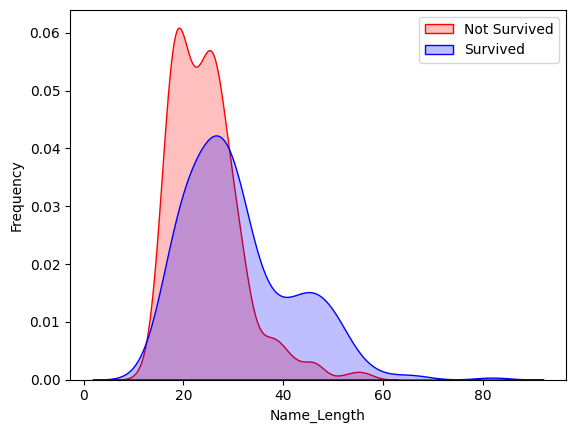

In [36]:
g=sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==0) & (train_df['Name_Length'].notnull())],color='Red',fill=True)
g=sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==1) & (train_df['Name_Length'].notnull())],ax=g,color='Blue',fill=True)
g.set_ylabel('Frequency')
g.set_xlabel('Name_Length')
g=g.legend(['Not Survived','Survived'])

In [37]:
train_df['Name_LengthGB']=pd.qcut(train_df['Name_Length'],8)
test_df['Name_LengthGB']=pd.qcut(test_df['Name_Length'],8)

In [38]:
train_df.groupby(['Name_LengthGB'],as_index=False)['Survived'].mean()

<ipython-input-38-a93232fc6d1f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'],as_index=False)['Survived'].mean()


,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [39]:
train_df.loc[train_df['Name_Length']<=18,'Name_Size']=0
train_df.loc[(train_df['Name_Length']>18) & (train_df['Name_Length']<=20),'Name_Size']=1
train_df.loc[(train_df['Name_Length']>20) & (train_df['Name_Length']<=23),'Name_Size']=2
train_df.loc[(train_df['Name_Length']>23) & (train_df['Name_Length']<=25),'Name_Size']=3
train_df.loc[(train_df['Name_Length']>25) & (train_df['Name_Length']<=27.25),'Name_Size']=4
train_df.loc[(train_df['Name_Length']>27.25) & (train_df['Name_Length']<=30),'Name_Size']=5
train_df.loc[(train_df['Name_Length']>30) & (train_df['Name_Length']<=38),'Name_Size']=5
train_df.loc[(train_df['Name_Length']>38) & (train_df['Name_Length']<=82),'Name_Size']=5
train_df.loc[train_df['Name_Length']>82,'Name_Size']

,Name_Size


In [40]:
test_df.loc[test_df['Name_Length']<=18,'Name_Size']=0
test_df.loc[(test_df['Name_Length']>18) & (test_df['Name_Length']<=20),'Name_Size']=1
test_df.loc[(test_df['Name_Length']>20) & (test_df['Name_Length']<=23),'Name_Size']=2
test_df.loc[(test_df['Name_Length']>23) & (test_df['Name_Length']<=25),'Name_Size']=3
test_df.loc[(test_df['Name_Length']>25) & (test_df['Name_Length']<=27.25),'Name_Size']=4
test_df.loc[(test_df['Name_Length']>27.25) & (test_df['Name_Length']<=30),'Name_Size']=5
test_df.loc[(test_df['Name_Length']>30) & (test_df['Name_Length']<=38),'Name_Size']=5
test_df.loc[(test_df['Name_Length']>38) & (test_df['Name_Length']<=82),'Name_Size']=5
test_df.loc[test_df['Name_Length']>82,'Name_Size']

,Name_Size


In [41]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",5.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",5.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


In [42]:
train_df['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [43]:
train_df['TicketNumber']=train_df['Ticket'].apply(lambda x:pd.Series({'Ticket':x.split(' ')[-1]}))
test_df['TicketNumber']=test_df['Ticket'].apply(lambda x:pd.Series({'Ticket':x.split(' ')[-1]}))

In [44]:
train_df.groupby(['TicketNumber'],as_index=False)['Survived'].agg(['count','mean']).sort_values(by='count',ascending=False)

,TicketNumber,count,mean
196,2343,7,0.000000
94,1601,7,0.714286
464,347082,7,0.000000
468,347088,6,0.000000
358,3101295,6,0.000000
...,...,...,...
55,1166,1,0.000000
311,28424,1,0.000000
312,28425,1,0.000000
313,28551,1,1.000000


In [45]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

,TicketNumber
0,1
1,1
2,1
3,2
4,1
...,...
886,1
887,1
888,2
889,1


In [46]:
train_df['TicketNumberCounts']=train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts']=train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [47]:
train_df.groupby(['TicketNumberCounts'],as_index=False)['Survived'].agg(['count','mean']).sort_values(by='count',ascending=False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [48]:
train_df['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [49]:
train_df['Ticket'].str.split(pat=' ',expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [50]:
train_df['TicketLocation']=np.where(train_df['Ticket'].str.split(pat=' ',expand=True)[1].notna(),train_df['Ticket'].str.split(pat=' ',expand=True)[0].apply(lambda x:x.strip()),'Blank')
test_df['TicketLocation']=np.where(test_df['Ticket'].str.split(pat=' ',expand=True)[1].notna(),test_df['Ticket'].str.split(pat=' ',expand=True)[0].apply(lambda x:x.strip()),'Blank')

In [51]:
train_df['TicketLocation'].value_counts()

,count
TicketLocation,
Blank,665
PC,60
C.A.,27
STON/O,12
A/5,10
W./C.,9
CA.,8
SOTON/O.Q.,8
A/5.,7


In [52]:
train_df['TicketLocation']=train_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'STON/O2.':'STON/O2',
    'SO/C':'SOC',
    'C.A.':'CA',
    'CA.':'CA',
    'S.O.C.':'SOC',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'A/4.':'A/4',
    'A.4.':'A/4',
    'A4.':'A/4',
    'W./C.':"W/C",
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris'
})

test_df['TicketLocation']=test_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'STON/O2.':'STON/O2',
    'SO/C':'SOC',
    'C.A.':'CA',
    'S.O.C.':'SOC',
    'A/5.':'A/5',
    'A./5.':'A/5',
    'A.5.':'A/5',
    'A/4.':'A/4',
    'A.4.':'A/4',
    'A4.':'A/4',
    'W./C.':"W/C",
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris'
})


In [53]:
train_df.groupby(['TicketLocation'],as_index=False)['Survived'].agg(['count','mean'])

,TicketLocation,count,mean
0,A/4,7,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,Blank,665,0.383459
4,C,5,0.400000
5,C.A./SOTON,1,0.000000
6,CA,41,0.341463
7,F.C.,1,0.000000
8,F.C.C.,5,0.800000
9,Fa,1,0.000000


In [54]:
train_df['Cabin']=train_df['Cabin'].fillna('U')
train_df['Cabin']=pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

In [55]:
test_df['Cabin']=test_df['Cabin'].fillna('U')
test_df['Cabin']=pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [56]:
train_df.groupby(['Cabin'],as_index=False)['Survived'].agg(['count','mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [57]:
train_df['Cabin_Assigned']=train_df['Cabin'].apply(lambda x:0 if x in ['U'] else 1)
test_df['Cabin_Assigned']=test_df['Cabin'].apply(lambda x:0 if x in ['U'] else 1)

In [58]:
train_df.groupby(['Cabin_Assigned'],as_index=False)['Survived'].agg(['count','mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [59]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",5.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",5.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,Blank,0


In [60]:
train_df.shape

(891, 24)

In [61]:
test_df.shape

(418, 23)

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  714 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    float64 
 10  Cabin                891 non-null    object  
 11  Embarked             889 non-null    object  
 12  Family_Size          891 non-null    int64   
 13  Family_Size_Grouped  891 non-null    object  
 14  Age_Cut              714 non-null    category
 15  Fare_Cut             89

In [63]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_Cut', 'Fare_Cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'TicketNumber', 'TicketNumberCounts',
       'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [64]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Pclass               418 non-null    int64   
 2   Name                 418 non-null    object  
 3   Sex                  418 non-null    object  
 4   Age                  332 non-null    float64 
 5   SibSp                418 non-null    int64   
 6   Parch                418 non-null    int64   
 7   Ticket               418 non-null    object  
 8   Fare                 417 non-null    float64 
 9   Cabin                418 non-null    object  
 10  Embarked             418 non-null    object  
 11  Family_Size          418 non-null    int64   
 12  Family_Size_Grouped  418 non-null    object  
 13  Age_Cut              335 non-null    category
 14  Fare_Cut             417 non-null    category
 15  Title                41

In [65]:
train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
test_df["Age"].fillna(test_df["Age"].mean(), inplace=True)
test_df["Fare"].fillna(test_df["Fare"].mean(), inplace=True)

<ipython-input-65-75e724818b08>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
<ipython-input-65-75e724818b08>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [66]:
ohe=OneHotEncoder(sparse_output=False)
ode=OrdinalEncoder()
SI=SimpleImputer(strategy='most_frequent')

In [67]:
ode_cols=['Family_Size_Grouped']
ohe_cols=['Sex','Embarked']

In [68]:
X=train_df.drop(['Survived'],axis=1)
y=train_df['Survived']
X_test=test_df.drop(['Age_Cut','Fare_Cut'],axis=1)

In [69]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=21,stratify=y)

In [70]:
ordinal_pipeline=Pipeline(steps=[
    ('inpute',SimpleImputer(strategy='most_frequent')),
    ('ord',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])

ohe_pipeline=Pipeline(steps=[
    ('inpute',SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [71]:
col_trans=ColumnTransformer(transformers=[
    ('inpute',SI,['Age']),
    ('ord_pipeline',ordinal_pipeline,ode_cols),
    ('ohe_pipeline',ohe_pipeline,ohe_cols),
    ('passthrough','passthrough',['Pclass','TicketNumberCounts','Cabin_Assigned','Name_Size'])
],
    remainder='drop',n_jobs=-1 )

In [72]:
rfc=RandomForestClassifier()

In [73]:
param_grid={
    'n_estimators':[100,150,200],
    'min_samples_split':[5,10,15],
    'min_samples_leaf':[1,2,4],
    'max_depth':[8,9,10,15,20],
    'criterion':['gini','entropy'],
}

In [74]:
CV_rfc=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [75]:
pipefinalrfc=make_pipeline(col_trans,CV_rfc)
pipefinalrfc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 150, 200]}))])

In [76]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 100}
0.8230079779375554


In [77]:
dtc=DecisionTreeClassifier()

In [78]:
param_grid={
    'min_samples_split':[5,10,15],
    'min_samples_leaf':[1,2,4],
    'max_depth':[10,20,30],
    'criterion':['gini','entropy'],
}

In [79]:
CV_dtc=GridSearchCV(estimator=dtc,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [80]:
pipefinaldtc=make_pipeline(col_trans,CV_dtc)
pipefinaldtc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [81]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.8131783709248499


In [82]:
knn=KNeighborsClassifier()

In [83]:
param_grid={
    'n_neighbors':[3,5,7,9,11],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'p':[1,2]
}

In [84]:
CV_knn=GridSearchCV(estimator=knn,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [85]:
pipefinalknn=make_pipeline(col_trans,CV_knn)
pipefinalknn.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [86]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'brute', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
0.8117994681374963


In [87]:
svc=SVC()

In [88]:
param_grid={
    'C':[100,10,1.0,0.1,0.01,0.001],
    'kernel':['linear','poly','rbf','sigmoid'],
}

In [89]:
CV_svc=GridSearchCV(estimator=svc,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [90]:
pipefinalsvc=make_pipeline(col_trans,CV_svc)
pipefinalsvc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [91]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.825854427262878


In [92]:
lr=LogisticRegression()

In [93]:
param_grid={
    'C':[100,10,1.0,0.1,0.01,0.001],
}

In [94]:
CV_lr=GridSearchCV(estimator=lr,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [95]:
pipefinallr=make_pipeline(col_trans,CV_lr)
pipefinallr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.01,
                                                0.001]}))])

In [96]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 0.1}
0.8075938146360683


In [97]:
gnb=GaussianNB()

In [98]:
param_grid={
    'var_smoothing':[0.00000001,0.000000001,0.0000000001],
}

In [99]:
CV_gnb=GridSearchCV(estimator=gnb,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [100]:
pipefinalgnb=make_pipeline(col_trans,CV_gnb)
pipefinalgnb.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-10]}))])

In [101]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-08}
0.7879641485275288


In [102]:
y_pred1=pipefinalrfc.predict(X_test)
y_pred2=pipefinaldtc.predict(X_test)
y_pred3=pipefinalknn.predict(X_test)
y_pred4=pipefinalsvc.predict(X_test)
y_pred5=pipefinallr.predict(X_test)
y_pred6=pipefinalgnb.predict(X_test)

In [103]:
submission1=pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':y_pred1
})
submission2=pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':y_pred2
})
submission3=pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':y_pred3
})
submission4=pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':y_pred4
})
submission5=pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':y_pred5
})
submission6=pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':y_pred6
})

In [104]:
submission1.to_csv('/content/submission912_1.csv',index=False)
submission2.to_csv('/content/submission912_2.csv',index=False)
submission3.to_csv('/content/submission912_3.csv',index=False)
submission4.to_csv('/content/submission912_4.csv',index=False)
submission5.to_csv('/content/submission912_5.csv',index=False)
submission6.to_csv('/content/submission912_6.csv',index=False)

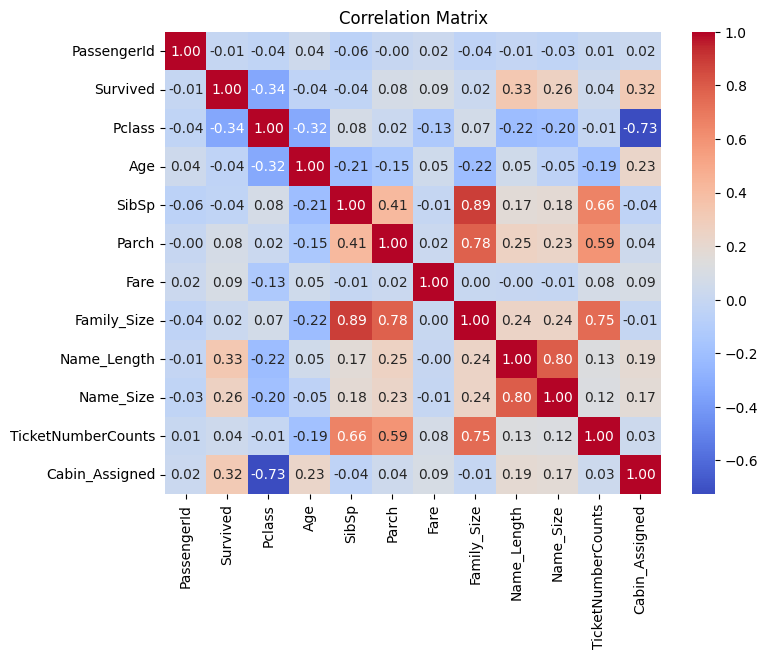

In [105]:
correlation_matrix=train_df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#New Drop Sibsp, Parch, TicketNumb

In [106]:
# new
X=train_df.drop(['Survived','SibSp','Parch'],axis=1)
y=train_df['Survived']
X_test=test_df.drop(['Age_Cut','Fare_Cut','SibSp','Parch'],axis=1)

In [107]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=21,stratify=y)

In [108]:
ordinal_pipeline=Pipeline(steps=[
    ('inpute',SimpleImputer(strategy='most_frequent')),
    ('ord',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])

ohe_pipeline=Pipeline(steps=[
    ('inpute',SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [109]:
col_trans=ColumnTransformer(transformers=[
    ('inpute',SI,['Age']),
    ('ord_pipeline',ordinal_pipeline,ode_cols),
    ('ohe_pipeline',ohe_pipeline,ohe_cols),
    ('passthrough','passthrough',['Pclass','Cabin_Assigned','Name_Size','Age','Fare','TicketNumberCounts'])
],
    remainder='drop',n_jobs=-1 )

In [110]:
rfc=RandomForestClassifier()

In [111]:
param_grid={
    'n_estimators':[150,200,300,500],
    'min_samples_split':[5,10,15],
    'min_samples_leaf':[2,4,5,6],
    'max_depth':[10,13,15,17,20],
    'criterion':['gini','entropy'],
}

In [112]:
CV_rfc=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [113]:
pipefinalrfc=make_pipeline(col_trans,CV_rfc)
pipefinalrfc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 13, 15, 17, 20],
                                          'min_samples_leaf': [2, 4, 5, 6],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [150, 200, 300,
                                                           500]}))])

In [114]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
0.8272530286614794


In [115]:
dtc=DecisionTreeClassifier()

In [116]:
param_grid={
    'min_samples_split':[5,10,15],
    'min_samples_leaf':[1,2,4],
    'max_depth':[10,20,30],
    'criterion':['gini','entropy'],
}

In [117]:
CV_dtc=GridSearchCV(estimator=dtc,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [118]:
pipefinaldtc=make_pipeline(col_trans,CV_dtc)
pipefinaldtc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [119]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.810400866738895


In [120]:
knn=KNeighborsClassifier()

In [121]:
param_grid={
    'n_neighbors':[3,5,7,9,11],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'p':[1,2]
}

In [122]:
CV_knn=GridSearchCV(estimator=knn,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [123]:
pipefinalknn=make_pipeline(col_trans,CV_knn)
pipefinalknn.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [124]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
0.7949473062149119


In [125]:
svc=SVC(probability=True)

In [126]:
param_grid={
    'C':[100,10,1.0,0.1,0.01,0.001],
    'kernel':['linear','poly','rbf','sigmoid'],
}

In [127]:
CV_svc=GridSearchCV(estimator=svc,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [128]:
pipefinalsvc=make_pipeline(col_trans,CV_svc)
pipefinalsvc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(probability=True),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [129]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 100, 'kernel': 'rbf'}
0.8019600118191669


In [130]:
lr=LogisticRegression()

In [131]:
param_grid={
    'C':[100,10,1.0,0.1,0.01,0.001],
}

In [132]:
CV_lr=GridSearchCV(estimator=lr,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [133]:
pipefinallr=make_pipeline(col_trans,CV_lr)
pipefinallr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.01,
                                                0.001]}))])

In [134]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 1.0}
0.8047769132276175


In [135]:
gnb=GaussianNB()

In [136]:
param_grid={
    'var_smoothing':[0.00000001,0.000000001,0.0000000001],
}

In [137]:
CV_gnb=GridSearchCV(estimator=gnb,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [138]:
pipefinalgnb=make_pipeline(col_trans,CV_gnb)
pipefinalgnb.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-10]}))])

In [139]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-08}
0.7752880921895006


In [140]:
xg=XGBClassifier()

In [141]:
param_grid={
    'booster':['gbtree','gblinear','dart']}

In [142]:
CV_xg=GridSearchCV(estimator=xg,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [143]:
pipefinalxg=make_pipeline(col_trans,CV_xg)
pipefinalxg.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              param_grid={'booster': ['gbtree', 'gblinear',
                                                      'dart']}))])

In [144]:
print(CV_xg.best_params_)
print(CV_xg.best_score_)

{'booster': 'gblinear'}
0.8019698611247907


In [145]:
abc=AdaBoostClassifier()

In [146]:
dtc_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,min_samples_leaf=4, min_samples_split=10)
svc_2 = SVC(probability=True, C=10, kernel='rbf')
lr_2 = LogisticRegression(C=0.1)
lr_3 = LogisticRegression(C=0.2)
lr_4 = LogisticRegression(C=0.05)

In [147]:
param_grid = {
    'estimator': [dtc_2, svc_2, lr_2,lr_3,lr_4],
    'n_estimators':  [5, 10, 25, 50, 100],
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [(0.97 + x / 100) for x in range(1, 7)]
}

In [148]:
CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [149]:
pipefinalabc= make_pipeline(col_trans, CV_abc)
pipefinalabc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                              estimator=AdaBoostClassifier(),
                              param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                                          'estimator': [DecisionTreeClassifier(criterion='entropy',
                                                                               max_depth=10,
                                                                               min_samples_leaf=4,
                                                                               min_samples_split=10),
                                                        SVC(C=10,
                                                            probability=True),
                                                        LogisticRegression(C=0.1),
                                                        LogisticRegression(C=0.2),
                                                        LogisticRegression(C=0.05)],
                                          'learning_rate': [0.98, 0.99, 1.0,
                                                            1.01, 1.02, 1.03],
                                          'n_estimators': [5, 10, 25, 50,
                                                           100]}))])

In [150]:
print(CV_abc.best_params_)
print(CV_abc.best_score_)

{'algorithm': 'SAMME.R', 'estimator': DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10), 'learning_rate': 0.99, 'n_estimators': 25}
0.7963163596966414


In [151]:
etc=ExtraTreesClassifier()

In [152]:
param_grid={
    'max_features':[1,3,10],
    'min_samples_split':[2,3,10],
    'min_samples_leaf':[1,3,10],
    'n_estimators':[100,300],
}

In [153]:
CV_etc=GridSearchCV(estimator=etc,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [154]:
pipefinaletc=make_pipeline(col_trans,CV_etc)
pipefinaletc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=ExtraTreesClassifier(),
                              param_grid={'max_features': [1, 3, 10],
                                          'min_samples_leaf': [1, 3, 10],
                                          'min_samples_split': [2, 3, 10],
                                          'n_estimators': [100, 300]}))])

In [155]:
print(CV_etc.best_params_)
print(CV_etc.best_score_)

{'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.8187826258248793


In [156]:
GBC=GradientBoostingClassifier()

In [157]:
param_grid={
    'n_estimators':[300,400,500],
    'learning_rate':[0.1,0.3,0.6,1.0],
    'max_depth':[8,10,12],
    'max_features':[0.1,0.3,0.5],
    'min_samples_leaf':[50,100,120,150],
}

In [158]:
CV_gbc=GridSearchCV(estimator=GBC,param_grid=param_grid,cv=StratifiedKFold(n_splits=5))

In [159]:
pipefinalgbc=make_pipeline(col_trans,CV_gbc)
pipefinalgbc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GradientBoostingClassifier(),
                              param_grid={'learning_rate': [0.1, 0.3, 0.6, 1.0],
                                          'max_depth': [8, 10, 12],
                                          'max_features': [0.1, 0.3, 0.5],
                                          'min_samples_leaf': [50, 100, 120,
                                                               150],
                                          'n_estimators': [300, 400, 500]}))])

In [160]:
print(CV_gbc.best_params_)
print(CV_gbc.best_score_)

{'learning_rate': 0.1, 'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 50, 'n_estimators': 300}
0.8202403230572244


In [161]:
from sklearn.ensemble import VotingClassifier

In [162]:
vc1 = VotingClassifier([('gbc', CV_gbc.best_estimator_),
                        ('etc', CV_etc.best_estimator_),
                          ('nb', CV_gnb.best_estimator_)
                         ], voting='hard', weights=[1,2,3] )

In [163]:
vc2 = VotingClassifier([('abc', CV_abc.best_estimator_),
                        ('etc', CV_etc.best_estimator_),
                          ('nb', CV_gnb.best_estimator_)
                         ], voting='hard', weights=[1,2,3] )
#1,2,3 is the best performing one

In [164]:
pipefinalcv1 = make_pipeline(col_trans, vc1)
pipefinalcv1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('gbc',
                                               GradientBoostingClassifier(max_depth=10,
                                                                          max_features=0.5,
                                                                          min_samples_leaf=50,
                                                                          n_estimators=300)),
                                              ('etc',
                                               ExtraTreesClassifier(max_features=1,
                                                                    min_samples_leaf=3,
                                                                    min_samples_split=10)),
                                              ('nb',
                                               GaussianNB(var_smoothing=1e-08))],
                                  weights=[1, 2, 3]))])

In [165]:
pipefinalcv2 = make_pipeline(col_trans, vc2)
pipefinalcv2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('inpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                ('votingclassifier',
                 VotingClassifier(estimators=[('abc',
                                               AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                                   max_depth=10,
                                                                                                   min_samples_leaf=4,
                                                                                                   min_samples_split=10),
                                                                  learning_rate=0.99,
                                                                  n_estimators=25)),
                                              ('etc',
                                               ExtraTreesClassifier(max_features=1,
                                                                    min_samples_leaf=3,
                                                                    min_samples_split=10)),
                                              ('nb',
                                               GaussianNB(var_smoothing=1e-08))],
                                  weights=[1, 2, 3]))])

In [169]:
Y_pred = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)
Y_pred3 = pipefinalknn.predict(X_test)
Y_pred4 = pipefinalsvc.predict(X_test)
Y_pred5 = pipefinallr.predict(X_test)
Y_pred6 = pipefinalgnb.predict(X_test)
Y_pred7 = pipefinalxg.predict(X_test)
Y_pred8 = pipefinalabc.predict(X_test)
Y_pred9 = pipefinaletc.predict(X_test)
Y_pred10 = pipefinalgbc.predict(X_test)
Y_pred11 = pipefinalcv1.predict(X_test)
Y_pred12 = pipefinalcv2.predict(X_test)

In [170]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred
})

submission2 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred2
})

submission3 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred3
})

submission4 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred4
})

submission5 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred5
})

submission6 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred6
})

submission7 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred7
})

submission8 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred8
})

submission9 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred9
})

submission10 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred10
})

submission11 = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred11
})

submission12 = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred12
})

In [172]:
submission.to_csv('/content/submission929_1.csv', index=False)
submission2.to_csv('/content/submission929_2.csv', index=False)
submission3.to_csv('/content/submission929_3.csv', index=False)
submission4.to_csv('/content/submission929_4.csv', index=False)
submission5.to_csv('/content/submission929_5.csv', index=False)
submission6.to_csv('/content/submission929_6.csv', index=False)
submission7.to_csv('/content/submission929_7.csv', index=False)
submission8.to_csv('/content/submission101_8.csv', index=False)
submission9.to_csv('/content/submission101_9.csv', index=False)
submission10.to_csv('/content/submission101_10.csv', index=False)
submission11.to_csv('/content/submission101_11.csv', index=False)
submission12.to_csv('/content/submission101_12.csv', index=False)